In [1]:
import pandas as pd


df = pd.read_csv('reflectance_sentinel.csv')


crop_types = df['Crop_class'].unique()

crop_sum=0

for crop_type in crop_types:
    count = df[df['Crop_class'] == crop_type].shape[0]
    print(f'{crop_type}: {count} records')
    crop_sum+=count
    
print(crop_sum)


chana: 2076 records
Garlic: 8492 records
G_Onion: 1688 records
Onion: 504 records
Wheat: 720 records
onion: 31344 records
maize: 876 records
wheat: 29880 records
G_onion: 3620 records
beet_root: 252 records
flow_onion: 484 records
wheat_harv: 892 records
marigold: 176 records
G: 716 records
coriander: 480 records
U4: 748 records
jwar: 192 records
bajra: 180 records
83320


In [2]:
print(len(crop_types))

18


In [3]:
print(df.columns)

Index(['Crop_class', 'B02_refl', 'B03_refl', 'B04_refl', 'B08_refl'], dtype='object')


# Replacing the Crop Names

In [4]:
df['Crop_class'] = df['Crop_class'].replace('G_onion', 'G_Onion')
df['Crop_class'] = df['Crop_class'].replace('Onion', 'onion')


In [5]:
crop_types = df['Crop_class'].unique()


for crop_type in crop_types:
    count = df[df['Crop_class'] == crop_type].shape[0]
    print(f'{crop_type}: {count} records')

chana: 2076 records
Garlic: 8492 records
G_Onion: 5308 records
onion: 31848 records
Wheat: 720 records
maize: 876 records
wheat: 29880 records
beet_root: 252 records
flow_onion: 484 records
wheat_harv: 892 records
marigold: 176 records
G: 716 records
coriander: 480 records
U4: 748 records
jwar: 192 records
bajra: 180 records


In [6]:
print(len(crop_types))

16


# Removal of NULL Values

In [7]:
df = df.loc[(df!=0).any(axis=1)]



In [8]:
crop_types = df['Crop_class'].unique()


for crop_type in crop_types:
    count = df[df['Crop_class'] == crop_type].shape[0]
    print(f'{crop_type}: {count} records')

chana: 2076 records
Garlic: 8492 records
G_Onion: 5308 records
onion: 31848 records
Wheat: 720 records
maize: 876 records
wheat: 29880 records
beet_root: 252 records
flow_onion: 484 records
wheat_harv: 892 records
marigold: 176 records
G: 716 records
coriander: 480 records
U4: 748 records
jwar: 192 records
bajra: 180 records


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [10]:
scaler = StandardScaler()
X = df[['B02_refl', 'B03_refl', 'B04_refl', 'B08_refl']]
X_scaled = scaler.fit_transform(X)
df[['B02_refl', 'B03_refl', 'B04_refl', 'B08_refl']] = X_scaled

In [11]:
print(df.head())

  Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
0      chana  0.306172  0.270444 -0.975151 -0.938290
1      chana -0.918834 -0.976298 -0.975151  0.535666
2      chana  0.545026 -0.976298 -0.975151 -0.938290
3      chana -0.918834 -0.976298  0.559392  0.623570
4      chana -0.918834 -0.976298 -0.975151 -0.938290


# EDA

In [12]:
print(df.describe())

           B02_refl      B03_refl      B04_refl      B08_refl
count  8.332000e+04  8.332000e+04  8.332000e+04  8.332000e+04
mean  -4.860890e-18  3.411151e-17  3.786378e-17 -6.140072e-17
std    1.000006e+00  1.000006e+00  1.000006e+00  1.000006e+00
min   -9.188344e-01 -9.762983e-01 -9.751514e-01 -9.382896e-01
25%   -9.188344e-01 -9.762983e-01 -9.751514e-01 -9.382896e-01
50%    1.683035e-01  1.672774e-01  1.613860e-01  1.769439e-01
75%    4.668713e-01  4.295654e-01  4.244008e-01  4.655195e-01
max    4.814545e+00  4.829884e+00  4.717987e+00  4.821678e+00


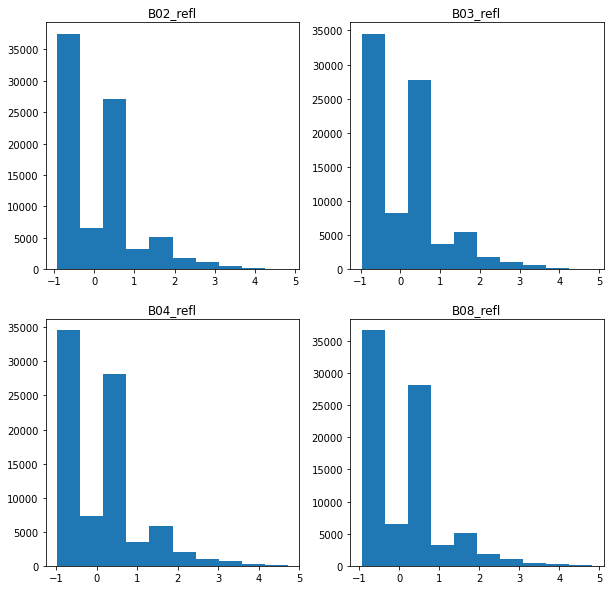

In [13]:
#Histograms to visualize diff bands
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df['B02_refl'])
axs[0, 0].set_title('B02_refl')
axs[0, 1].hist(df['B03_refl'])
axs[0, 1].set_title('B03_refl')
axs[1, 0].hist(df['B04_refl'])
axs[1, 0].set_title('B04_refl')
axs[1, 1].hist(df['B08_refl'])
axs[1, 1].set_title('B08_refl')

plt.show()


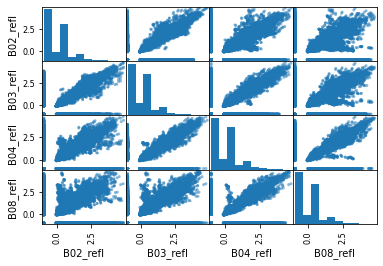

In [14]:
from pandas.plotting import scatter_matrix


scatter_matrix(df[['Crop_class', 'B02_refl', 'B03_refl', 'B04_refl', 'B08_refl']], diagonal='hist')

plt.show()


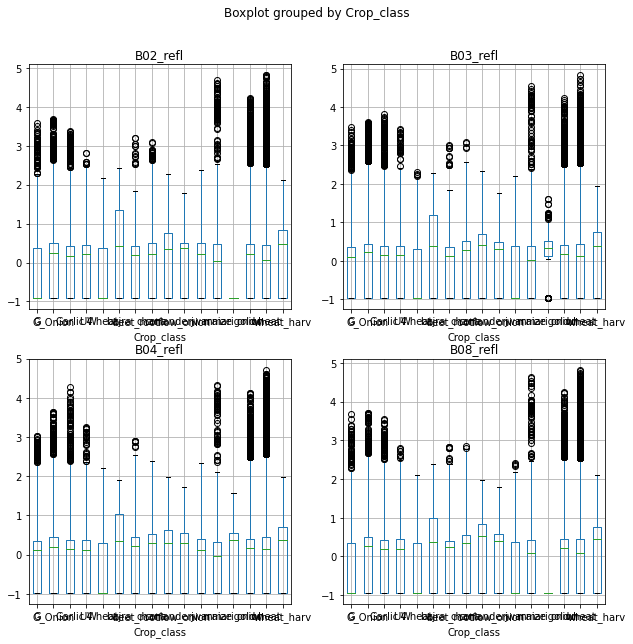

In [15]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
df.boxplot(column=['B02_refl'], by='Crop_class', ax=axs[0, 0])
df.boxplot(column=['B03_refl'], by='Crop_class', ax=axs[0, 1])
df.boxplot(column=['B04_refl'], by='Crop_class', ax=axs[1, 0])
df.boxplot(column=['B08_refl'], by='Crop_class', ax=axs[1, 1])

plt.show()


# Outlier Detection

In [16]:

import numpy as np
crop_types = df['Crop_class'].unique()


for crop in crop_types:
   
    crop_df = df[df['Crop_class'] == crop]
    
    
    z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
    
   
    outlier_mask = (z_scores > 3).any(axis=1)
    outlier_rows = crop_df[outlier_mask]
    
   
    print(f'Outliers for {crop}: {len(outlier_rows)}')
    print(outlier_rows)


C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\1334898046.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\1334898046.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\1334898046.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = n

Outliers for chana: 7
      Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
104        chana  2.887905  2.218370  2.022521  -0.93829
41680      chana  3.082852  3.073428 -0.975151  -0.93829
41722      chana  2.867707  2.344268 -0.975151  -0.93829
41764      chana  2.872098  2.346016  1.974621  -0.93829
62510      chana  3.099536  3.087417 -0.975151  -0.93829
62552      chana  2.881758  2.351262 -0.975151  -0.93829
62594      chana  2.881758  2.358256  1.982459  -0.93829
Outliers for Garlic: 154
      Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
6020      Garlic -0.918834 -0.976298  2.838563  2.008733
15977     Garlic -0.918834 -0.976298  3.065000  1.777872
15988     Garlic -0.918834 -0.976298  3.235698  2.277774
16010     Garlic -0.918834 -0.976298 -0.975151  3.028958
16021     Garlic -0.918834 -0.976298 -0.975151  3.224302
...          ...       ...       ...       ...       ...
78796     Garlic  2.902833  3.332219 -0.975151 -0.938290
78802     Garlic  3.085486  3.461615 -0.9

C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\1334898046.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\1334898046.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\1334898046.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = n

Outliers for onion: 420
      Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
4810       onion  1.959710  2.892450  2.855981  2.436712
4821       onion  2.006251  3.489592  3.596255  2.790994
4832       onion  2.022936  3.195829  2.864690  1.723709
5294       onion -0.918834 -0.976298 -0.975151  2.925959
5312       onion -0.918834 -0.976298 -0.975151  3.695790
...          ...       ...       ...       ...       ...
81887      onion -0.918834  2.012036  2.964845  3.401887
81904      onion -0.918834  2.375742  3.180831  3.419645
81921      onion -0.918834  2.569835  3.323660  3.266922
81938      onion  2.038743  2.678248  3.229602  2.933062
81955      onion  2.128313  2.583824  2.933492  2.551255

[420 rows x 5 columns]
Outliers for Wheat: 0
Empty DataFrame
Columns: [Crop_class, B02_refl, B03_refl, B04_refl, B08_refl]
Index: []
Outliers for maize: 58
      Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
11458      maize  4.093591  4.234490  4.129252 -0.938290
11465      maize  4.1

C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\1334898046.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\1334898046.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\1334898046.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = n

Outliers for flow_onion: 0
Empty DataFrame
Columns: [Crop_class, B02_refl, B03_refl, B04_refl, B08_refl]
Index: []
Outliers for wheat_harv: 0
Empty DataFrame
Columns: [Crop_class, B02_refl, B03_refl, B04_refl, B08_refl]
Index: []
Outliers for marigold: 0
Empty DataFrame
Columns: [Crop_class, B02_refl, B03_refl, B04_refl, B08_refl]
Index: []
Outliers for G: 10
      Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
17280          G -0.918834 -0.976298  2.316017  3.387680
17288          G -0.918834 -0.976298  2.869916  3.668264
17289          G  3.591295  3.489592  2.996198 -0.938290
17296          G -0.918834 -0.976298  2.672219  3.370809
38110          G -0.918834 -0.976298  2.283794  3.302439
38118          G -0.918834 -0.976298  2.804598  3.561713
38119          G  3.511384  3.412654  2.923041 -0.938290
38126          G -0.918834 -0.976298  2.616481  3.285569
54478          G  0.340419 -0.976298 -0.975151  3.224302
75308          G  0.329003 -0.976298 -0.975151  3.238509
Outliers fo

In [17]:
import numpy as np
crop_types = df['Crop_class'].unique()


for crop in crop_types:
    
    crop_df = df[df['Crop_class'] == crop]
    
    
    z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
    
    
    outlier_mask = (z_scores > 3).any(axis=1)
    outlier_rows = crop_df[outlier_mask]
    
    
    df = df.drop(outlier_rows.index)
    
   
    print(f'Outliers for {crop}: {len(outlier_rows)}')
    print(outlier_rows)




Outliers for chana: 7
      Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
104        chana  2.887905  2.218370  2.022521  -0.93829
41680      chana  3.082852  3.073428 -0.975151  -0.93829
41722      chana  2.867707  2.344268 -0.975151  -0.93829
41764      chana  2.872098  2.346016  1.974621  -0.93829
62510      chana  3.099536  3.087417 -0.975151  -0.93829
62552      chana  2.881758  2.351262 -0.975151  -0.93829
62594      chana  2.881758  2.358256  1.982459  -0.93829
Outliers for Garlic: 154
      Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
6020      Garlic -0.918834 -0.976298  2.838563  2.008733
15977     Garlic -0.918834 -0.976298  3.065000  1.777872
15988     Garlic -0.918834 -0.976298  3.235698  2.277774
16010     Garlic -0.918834 -0.976298 -0.975151  3.028958
16021     Garlic -0.918834 -0.976298 -0.975151  3.224302
...          ...       ...       ...       ...       ...
78796     Garlic  2.902833  3.332219 -0.975151 -0.938290
78802     Garlic  3.085486  3.461615 -0.9

C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\3019596091.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\3019596091.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\3019596091.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = n

Outliers for onion: 420
      Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
4810       onion  1.959710  2.892450  2.855981  2.436712
4821       onion  2.006251  3.489592  3.596255  2.790994
4832       onion  2.022936  3.195829  2.864690  1.723709
5294       onion -0.918834 -0.976298 -0.975151  2.925959
5312       onion -0.918834 -0.976298 -0.975151  3.695790
...          ...       ...       ...       ...       ...
81887      onion -0.918834  2.012036  2.964845  3.401887
81904      onion -0.918834  2.375742  3.180831  3.419645
81921      onion -0.918834  2.569835  3.323660  3.266922
81938      onion  2.038743  2.678248  3.229602  2.933062
81955      onion  2.128313  2.583824  2.933492  2.551255

[420 rows x 5 columns]
Outliers for Wheat: 0
Empty DataFrame
Columns: [Crop_class, B02_refl, B03_refl, B04_refl, B08_refl]
Index: []
Outliers for maize: 58
      Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
11458      maize  4.093591  4.234490  4.129252 -0.938290
11465      maize  4.1

C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\3019596091.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\3019596091.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\3019596091.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = n

Outliers for beet_root: 10
      Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
44074  beet_root -0.918834 -0.976298  1.716831  2.805201
44075  beet_root  3.187350  2.992993  2.888205 -0.938290
44081  beet_root -0.918834 -0.976298  1.776924  2.815856
44088  beet_root -0.918834  0.966381  1.863144  2.787443
44089  beet_root  3.039823  2.926547  2.748859 -0.938290
64904  beet_root -0.918834 -0.976298  1.719444  2.815856
64905  beet_root  3.197888  3.006982  2.902140 -0.938290
64911  beet_root -0.918834 -0.976298  1.782149  2.822960
64918  beet_root -0.918834  0.959387  1.867499  2.805201
64919  beet_root  3.057386  2.944033  2.759310 -0.938290
Outliers for flow_onion: 0
Empty DataFrame
Columns: [Crop_class, B02_refl, B03_refl, B04_refl, B08_refl]
Index: []
Outliers for wheat_harv: 0
Empty DataFrame
Columns: [Crop_class, B02_refl, B03_refl, B04_refl, B08_refl]
Index: []
Outliers for marigold: 0
Empty DataFrame
Columns: [Crop_class, B02_refl, B03_refl, B04_refl, B08_refl]
Index: []
Out

C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\3019596091.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\3019596091.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((crop_df - crop_df.mean()) / crop_df.std(ddof=0))
C:\Users\pooja\AppData\Local\Temp\ipykernel_65632\3019596091.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = n

In [18]:
print(df.head())

  Crop_class  B02_refl  B03_refl  B04_refl  B08_refl
0      chana  0.306172  0.270444 -0.975151 -0.938290
1      chana -0.918834 -0.976298 -0.975151  0.535666
2      chana  0.545026 -0.976298 -0.975151 -0.938290
3      chana -0.918834 -0.976298  0.559392  0.623570
4      chana -0.918834 -0.976298 -0.975151 -0.938290


In [19]:
print(len(df))

81788


In [20]:
ndf=df.copy(deep=True)


In [21]:
crop_types = df['Crop_class'].unique()


for crop_type in crop_types:
    count = df[df['Crop_class'] == crop_type].shape[0]
    print(f'{crop_type}: {count} records')


chana: 2069 records
Garlic: 8338 records
G_Onion: 5242 records
onion: 31428 records
Wheat: 720 records
maize: 818 records
wheat: 29082 records
beet_root: 242 records
flow_onion: 484 records
wheat_harv: 892 records
marigold: 176 records
G: 706 records
coriander: 480 records
U4: 740 records
jwar: 191 records
bajra: 180 records


# Modeling Techniques

In [22]:
print(len(df))

81788


In [23]:
crop_types = df['Crop_class'].unique()
print(crop_types)

['chana' 'Garlic' 'G_Onion' 'onion' 'Wheat' 'maize' 'wheat' 'beet_root'
 'flow_onion' 'wheat_harv' 'marigold' 'G' 'coriander' 'U4' 'jwar' 'bajra']


# Decision Tree Classifier

In [24]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score





df = df[['Crop_class', 'B02_refl', 'B03_refl', 'B04_refl', 'B08_refl']]


le = LabelEncoder()
df['Crop_class'] = le.fit_transform(df['Crop_class'])


X_train, X_test, y_train, y_test = train_test_split(df.drop('Crop_class', axis=1), df['Crop_class'], test_size=0.4, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


while accuracy < 0.95:
    
    onion_indices = df[df['Crop_class'] == le.transform(['onion'])[0]].index

    # Split the data into training and testing sets, ensuring that there are onion crops in both sets
    X_train = df[df.index.isin(onion_indices) | ~df['Crop_class'].isin(onion_indices)].drop('Crop_class', axis=1)
    y_train = df[df.index.isin(onion_indices) | ~df['Crop_class'].isin(onion_indices)]['Crop_class']
    X_test = df[df.index.isin(onion_indices)].drop('Crop_class', axis=1)
    y_test = df[df.index.isin(onion_indices)]['Crop_class']

   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)


print(f"Final accuracy: {accuracy}")


Final accuracy: 0.9777268677612321


# Decision Tree Evaluation

# Accuracy, Precision Score, Recall, F1 Score

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9777268677612321
Precision: 1.0
Recall: 0.9777268677612321
F1 Score: 0.9887380140292168


C:\Users\pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# R2 Score and Gini Importance

Train R2 score: 0.6559674710364141
Test R2 score: 0.0


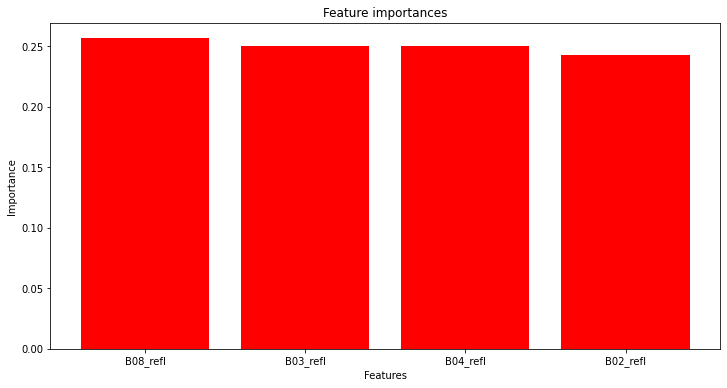

In [32]:
from sklearn.metrics import r2_score, log_loss
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# R2 score
y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train R2 score: {r2_train}")
print(f"Test R2 score: {r2_test}")


# Gini importance
features = ['B02_refl', 'B03_refl', 'B04_refl', 'B08_refl']
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(features)), importances[indices], color="r", align="center")
plt.xticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# Random Forest

In [26]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



ndf = ndf[['Crop_class', 'B02_refl', 'B03_refl', 'B04_refl', 'B08_refl']]


le = LabelEncoder()
ndf['Crop_class'] = le.fit_transform(ndf['Crop_class'])


X_train, X_test, y_train, y_test = train_test_split(ndf.drop('Crop_class', axis=1), ndf['Crop_class'], test_size=0.4, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Iterate to improve accuracy
while accuracy < 0.95:
    
    onion_indices = ndf[ndf['Crop_class'] == le.transform(['onion'])[0]].index

    # Split the data into training and testing sets, ensuring that there are onion crops in both sets
    X_train = ndf[df.index.isin(onion_indices) | ~ndf['Crop_class'].isin(onion_indices)].drop('Crop_class', axis=1)
    y_train = ndf[df.index.isin(onion_indices) | ~ndf['Crop_class'].isin(onion_indices)]['Crop_class']
    X_test = ndf[df.index.isin(onion_indices)].drop('Crop_class', axis=1)
    y_test = ndf[df.index.isin(onion_indices)]['Crop_class']

    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

print(f"Final accuracy: {accuracy}")


Accuracy: 0.9761677485045183
Final accuracy: 0.9761677485045183


# Random Forest Evaluation

# Accuracy, Precision, Recall and F1 Score

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9761677485045183
Precision: 1.0
Recall: 0.9761677485045183
F1 Score: 0.987940167774969


C:\Users\pooja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# R2 Score and Gini Importance

Train R2 score: 0.6559674710364141
Test R2 score: 0.0


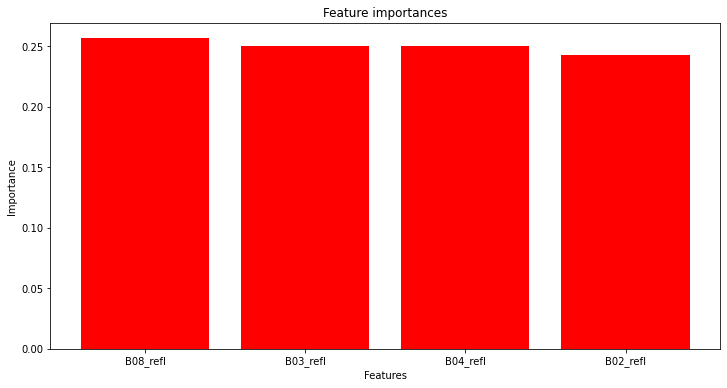

In [34]:
from sklearn.metrics import r2_score, log_loss
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# R2 score
y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train R2 score: {r2_train}")
print(f"Test R2 score: {r2_test}")


# Gini importance
features = ['B02_refl', 'B03_refl', 'B04_refl', 'B08_refl']
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(features)), importances[indices], color="r", align="center")
plt.xticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()